# Genomes Analysis and Regularization

In [28]:
import pickle
import neat
import graphviz
import matplotlib.pyplot as plt

## Load genomes

In [30]:
path = "../results/long_neat_800_400_300_5_30_u_5/best_genome.pkl"
with open(path, "rb") as f:
    winner1 = pickle.load(f)
path = "../results/long_neat_800_400_300_5_30_b_5/best_genome.pkl"
with open(path, "rb") as f:
    winner2 = pickle.load(f)

In [31]:
# load config
config_path = "../config-feedforward.txt"
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

## Visualize genomes

In [32]:
def draw_net(config, genome, view=False, filename=None, node_names=None, show_disabled=True, prune_unused=False,
             node_colors=None, fmt='svg'):
    """ Receives a genome and draws a neural network with arbitrary topology. """
    # Attributes for network nodes.
    # if graphviz is None:
    #     warnings.warn("This display is not available due to a missing optional dependency (graphviz)")
    #     return

    # If requested, use a copy of the genome which omits all components that won't affect the output.
    if prune_unused:
        genome = genome.get_pruned_copy(config.genome_config)

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {
        'shape': 'circle',
        'fontsize': '9',
        'height': '0.2',
        'width': '0.2'}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {'style': 'filled', 'shape': 'box', 'fillcolor': node_colors.get(k, 'lightgray')}
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {'style': 'filled', 'fillcolor': node_colors.get(k, 'lightblue')}

        dot.node(name, _attributes=node_attrs)

    used_nodes = set(genome.nodes.keys())
    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {'style': 'filled',
                 'fillcolor': node_colors.get(n, 'white')}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:
            # if cg.input not in used_nodes or cg.output not in used_nodes:
            #    continue
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = 'solid' if cg.enabled else 'dotted'
            color = 'green' if cg.weight > 0 else 'red'
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(a, b, _attributes={'style': style, 'color': color, 'penwidth': width})

    dot.render(filename, view=view)

    return dot

In [33]:
def print_genome_structure(genome):
    print(f"Genome ID: {genome.key}")
    
    # Print nodes
    print("\nNodes:")
    for node_id, node in genome.nodes.items():
        print(f"  Node {node_id}: {node}")
    
    # Print connections
    print("\nConnections:")
    for connection in genome.connections.values():
        print(f" {connection}")

Size is 'complexity': (number of nodes, number of enabled connections)

In [34]:
print(len(winner1.nodes), sum(1 for cg in winner1.connections.values() if cg.enabled))
print(winner1.size())
print(len(winner1.connections))

4 53
(4, 53)
71


In [35]:
print_genome_structure(winner1)

Genome ID: 85160

Nodes:
  Node 0: DefaultNodeGene(key=0, bias=-1.0815566969314359, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 1: DefaultNodeGene(key=1, bias=-2.120266645527879, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 2: DefaultNodeGene(key=2, bias=-1.4621395190583257, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 8919: DefaultNodeGene(key=8919, bias=-1.3813471307841847, response=1.0, activation=neat_sigmoid, aggregation=sum)

Connections:
 DefaultConnectionGene(key=(-6, 1), weight=-2.4556424440270135, enabled=True)
 DefaultConnectionGene(key=(-35, 2), weight=-0.11030423118628507, enabled=True)
 DefaultConnectionGene(key=(-18, 0), weight=-1.3991569058934556, enabled=False)
 DefaultConnectionGene(key=(-35, 0), weight=3.5671432409729946, enabled=True)
 DefaultConnectionGene(key=(-37, 2), weight=-5.0, enabled=True)
 DefaultConnectionGene(key=(-8, 1), weight=-2.7861737354825324, enabled=True)
 DefaultConnectionGene(key=(-13, 2), w

In [36]:
print_genome_structure(winner2)

Genome ID: 103520

Nodes:
  Node 0: DefaultNodeGene(key=0, bias=-0.466315487242879, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 1: DefaultNodeGene(key=1, bias=-1.0458830487629343, response=1.0, activation=neat_sigmoid, aggregation=sum)
  Node 2: DefaultNodeGene(key=2, bias=0.4640896305285793, response=1.0, activation=neat_sigmoid, aggregation=sum)

Connections:
 DefaultConnectionGene(key=(-29, 0), weight=2.2640210096507487, enabled=True)
 DefaultConnectionGene(key=(-20, 0), weight=2.210252189384733, enabled=True)
 DefaultConnectionGene(key=(-30, 2), weight=2.354968070801055, enabled=False)
 DefaultConnectionGene(key=(-21, 2), weight=1.4748459281492428, enabled=True)
 DefaultConnectionGene(key=(-18, 0), weight=0.7786662239328258, enabled=True)
 DefaultConnectionGene(key=(-5, 0), weight=1.1875988062383036, enabled=True)
 DefaultConnectionGene(key=(-7, 1), weight=0.28230419938939855, enabled=True)
 DefaultConnectionGene(key=(-4, 0), weight=-4.409054859880028, enabled=Tr

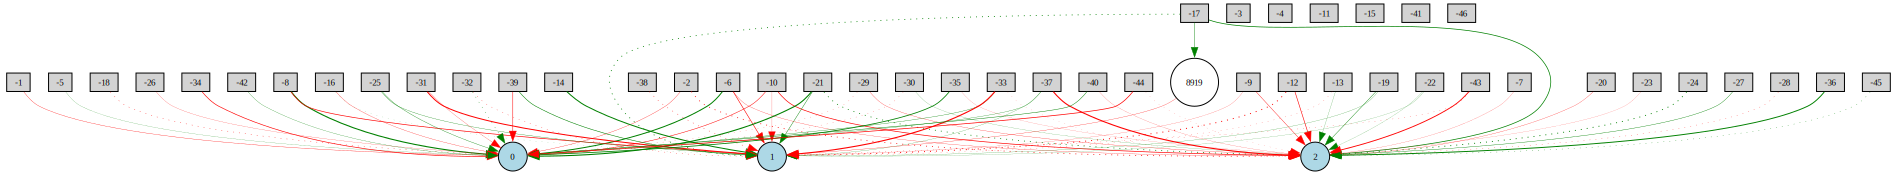

In [37]:
draw_net(config, winner1)

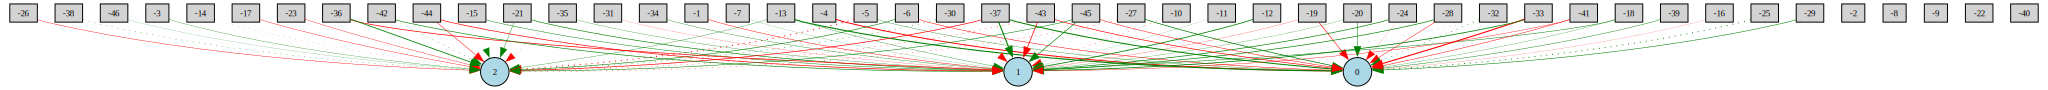

In [38]:
draw_net(config, winner2)

## Regularizations

### Weights 

In [39]:
weight_penality = 0
for c in winner1.connections:
    if c in winner2.connections:
        weight_penality += (winner1.connections[c].weight - winner2.connections[c].weight) **2
        # print(winner1.connections[c].weight, winner2.connections[c].weight, "Connection", c, "is in both genomes")
weight_lambda = 0.01
weight_penality, weight_lambda * weight_penality

(386.0445628285637, 3.860445628285637)

### Innovation Difference

Whenever a new gene appears (through structural mutation), a global innovation number is incremented and assigned to that gene. The innovation numbers thus represent a chronology of the appearance of every gene in the system. 

The symmetric_difference() method returns a set that contains all items from both set, but not the items that are present in both sets. Meaning: The returned set contains a mix of items that are not present in both sets.

In [40]:
def innovation_difference(genome1, genome2):
    diff = 0
    
    # Compare connections
    genome1_conn_innovations = set(gene.key for gene in genome1.connections.values())
    genome2_conn_innovations = set(gene.key for gene in genome2.connections.values())
    
    conn_diff = len(genome1_conn_innovations.symmetric_difference(genome2_conn_innovations))
    diff += conn_diff
    # print("Connection diff", conn_diff)
    # Compare nodes
    genome1_node_innovations = set(gene.key for gene in genome1.nodes.values())
    genome2_node_innovations = set(gene.key for gene in genome2.nodes.values())
    
    node_diff = len(genome1_node_innovations.symmetric_difference(genome2_node_innovations))
    diff += node_diff
    # print("Node diff", node_diff)
    return diff

innovation_lambda = 0.01
innovation_penalty = innovation_difference(winner1, winner2)
innovation_penalty, innovation_lambda * innovation_penalty

(73, 0.73)

### Genomic distance

An approximate measure of the difference between genomes, used in dividing the population into species.

In [41]:
config.compatibility_weight_coefficient = 0.6
config.compatibility_disjoint_coefficient = 1.0
distance_lambda = 0.5
distance_penalty = winner1.distance(winner2, config)
distance_penalty, distance_lambda * distance_penalty

(2.6898387336141223, 1.3449193668070611)

### Fitness after regularization

In [42]:
print(winner2.fitness)
winner2.fitness - (weight_lambda * weight_penality + distance_lambda * distance_penalty + innovation_lambda * innovation_penalty)

48.0


42.0646350049073